In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from graphufs.stacked_utils import convert_loss_channel2var

In [2]:
_scratch = "/pscratch/sd/n/nagarwal"
_prototype = "atm-only"
_expt = "R1"
_prototypes = "/global/homes/n/nagarwal/graph-ufs/prototypes/"

In [3]:
from prototypes.atm_only.R1.config import Trainer as Emulator 

In [4]:
# open loss
ds = xr.open_dataset(os.path.join(_scratch, _prototype, _expt, "loss.nc"))
ds.load()

<xarray.Dataset> Size: 143MB
Dimensions:                (optim_step: 379760, epoch: 80, channel: 86)
Coordinates:
  * optim_step             (optim_step) int64 3MB 0 1 2 ... 379757 379758 379759
  * epoch                  (epoch) int64 640B 1 2 3 4 5 6 ... 75 76 77 78 79 80
  * channel                (channel) int64 688B 0 1 2 3 4 5 ... 81 82 83 84 85
Data variables:
    loss                   (optim_step) float32 2MB 7.314 7.107 ... 0.4677
    loss_by_channel        (optim_step, channel) float32 131MB 0.02005 ... 0....
    loss_by_channel_valid  (epoch, channel) float32 28kB 0.01005 ... 0.001114
    loss_avg               (epoch) float32 320B 1.917 1.089 ... 0.557 0.5562
    loss_valid             (epoch) float32 320B 1.182 1.157 ... 0.6205 0.7686
    mgrad                  (epoch) float32 320B 0.0004042 0.001242 ... 0.0003387
    g_norm                 (optim_step) float64 3MB nan nan nan ... nan nan nan
    learning_rate          (optim_step) float32 2MB 0.0 1e-06 2e-06 ... 0.0 0.0
    epoch_label            (optim_step) float64 3MB 1.0 1.0 1.0 ... 80.0 80.0
Attributes:
    batch_size:  16

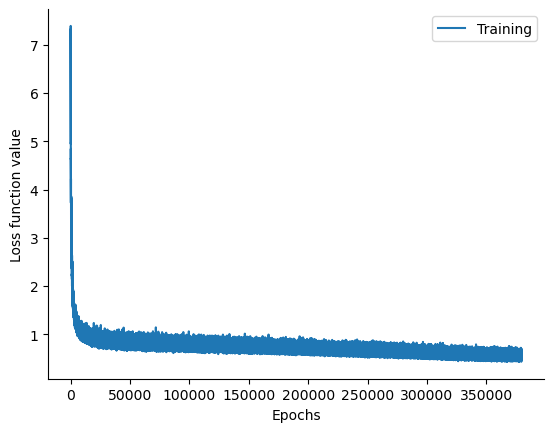

In [5]:
fig, ax = plt.subplots()

ax.plot(ds.loss, label="Training")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
#fig.savefig("loss.png")
plt.show()

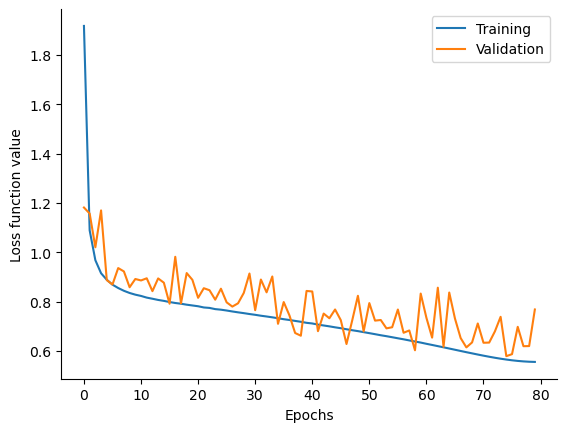

In [6]:
fig, ax = plt.subplots()
epochs = 5

ax.plot(ds.loss_avg, label="Training")
ax.plot(ds.loss_valid, label="Validation")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
#fig.savefig("loss.png")
plt.show()

In [7]:
# covert channel loss to var loss
var_loss = convert_loss_channel2var(Emulator, ds.loss_by_channel)
var_loss

<xarray.Dataset> Size: 134MB
Dimensions:     (level: 16, optim_step: 379760)
Coordinates:
  * level       (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * optim_step  (optim_step) int64 3MB 0 1 2 3 4 ... 379756 379757 379758 379759
Data variables:
    dzdt        (level, optim_step) float32 24MB 0.02005 0.01965 ... 0.04115
    pressfc     (optim_step) float32 2MB 0.01914 0.02017 ... 0.0003536 0.0002997
    spfh        (level, optim_step) float32 24MB 0.0222 0.02189 ... 0.001294
    spfh2m      (optim_step) float32 2MB 0.01865 0.01813 ... 0.002279 0.002334
    tmp         (level, optim_step) float32 24MB 0.01358 0.0134 ... 0.0004046
    tmp2m       (optim_step) float32 2MB 0.02988 0.03284 ... 0.0005993 0.0005887
    tmpsfc      (optim_step) float32 2MB 0.01629 0.01726 ... 0.0004574 0.000487
    ugrd        (level, optim_step) float32 24MB 0.02926 0.02924 ... 0.001119
    ugrd10m     (optim_step) float32 2MB 0.04584 0.04663 ... 0.00122 0.001156
    vgrd        (level, optim_step) float32 24MB 0.01886 0.01808 ... 0.0009049
    vgrd10m     (optim_step) float32 2MB 0.01583 0.01605 ... 0.001064 0.001004

In [8]:
def plot_loss_3d(var, extended_name):
    #fig, ax = plt.subplots(2, 5, figsize=(20,8), sharex=True)
    fig, ax = plt.subplots(4, 4, figsize=(20,8), sharex=True)
    
    for i in range(var_loss.dims["level"]):
        ax_i = int(i/4); ax_j = int(i%4)
        ax[ax_i][ax_j].plot(var_loss[var].isel(level=i))
        ax[ax_i][ax_j].set_title(f"level={var_loss.coords['level'][i].values:.2f}")
        

    figname = f"train_loss_nepochs-{ds.sizes['epoch']}_{extended_name}_{_prototype}.png"
    figloc = os.path.join(_prototypes, _prototype.replace('-','_'), _expt, "figures", figname)
    plt.suptitle(f"Loss per optim step: {extended_name.capitalize()}")
    fig.supxlabel("Optim Steps",)
    fig.supylabel("Loss value",)
    plt.tight_layout()
    #plt.savefig(figloc, dpi=300)
    
    return fig, ax

In [14]:
def plot_loss_2d(var, extended_name):
    #fig, ax = plt.subplots(2, 5, figsize=(20,8), sharex=True)
    fig, ax = plt.subplots(1, 1, figsize=(8,6),)

    ax.plot(var_loss[var])
        
    figname = f"train_loss_nepochs-{ds.sizes['epoch']}_{extended_name}_{_prototype}.png"
    figloc = os.path.join(_prototypes, _prototype.replace('-','_'), _expt, "figures", figname)
    plt.suptitle(f"Loss per optim step: {extended_name.capitalize()}")
    fig.supxlabel("Optim Steps",)
    fig.supylabel("Loss value",)
    plt.tight_layout()
    #plt.savefig(figloc, dpi=300)
    
    return fig, ax

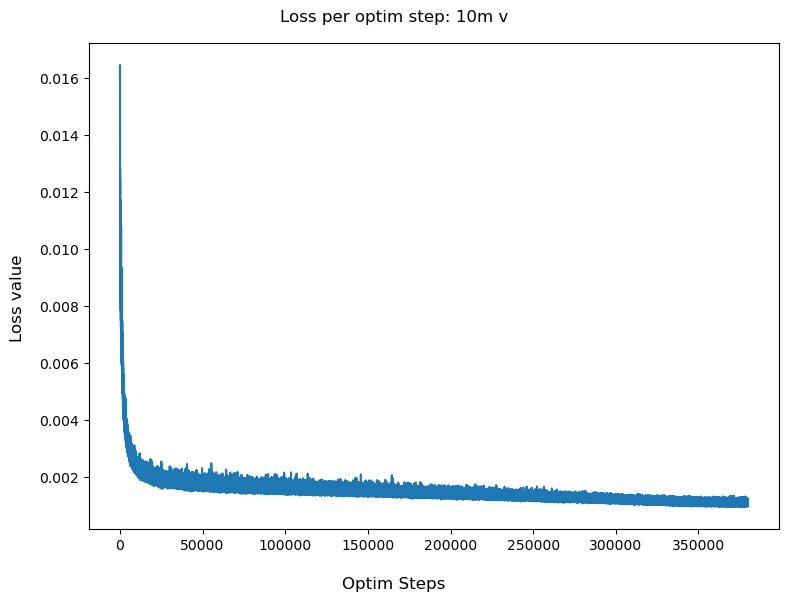

In [23]:
# plot
var = "vgrd10m"
extended_var = "10m V"

if "level" in var_loss[var].dims or "z_l" in var_loss[var].dims:
    fig, ax = plot_loss_3d(var, extended_var)
else:
    fig, ax = plot_loss_2d(var, extended_var)

/tmp/ipykernel_1994815/1453567503.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(var_loss.dims["z_l"]):


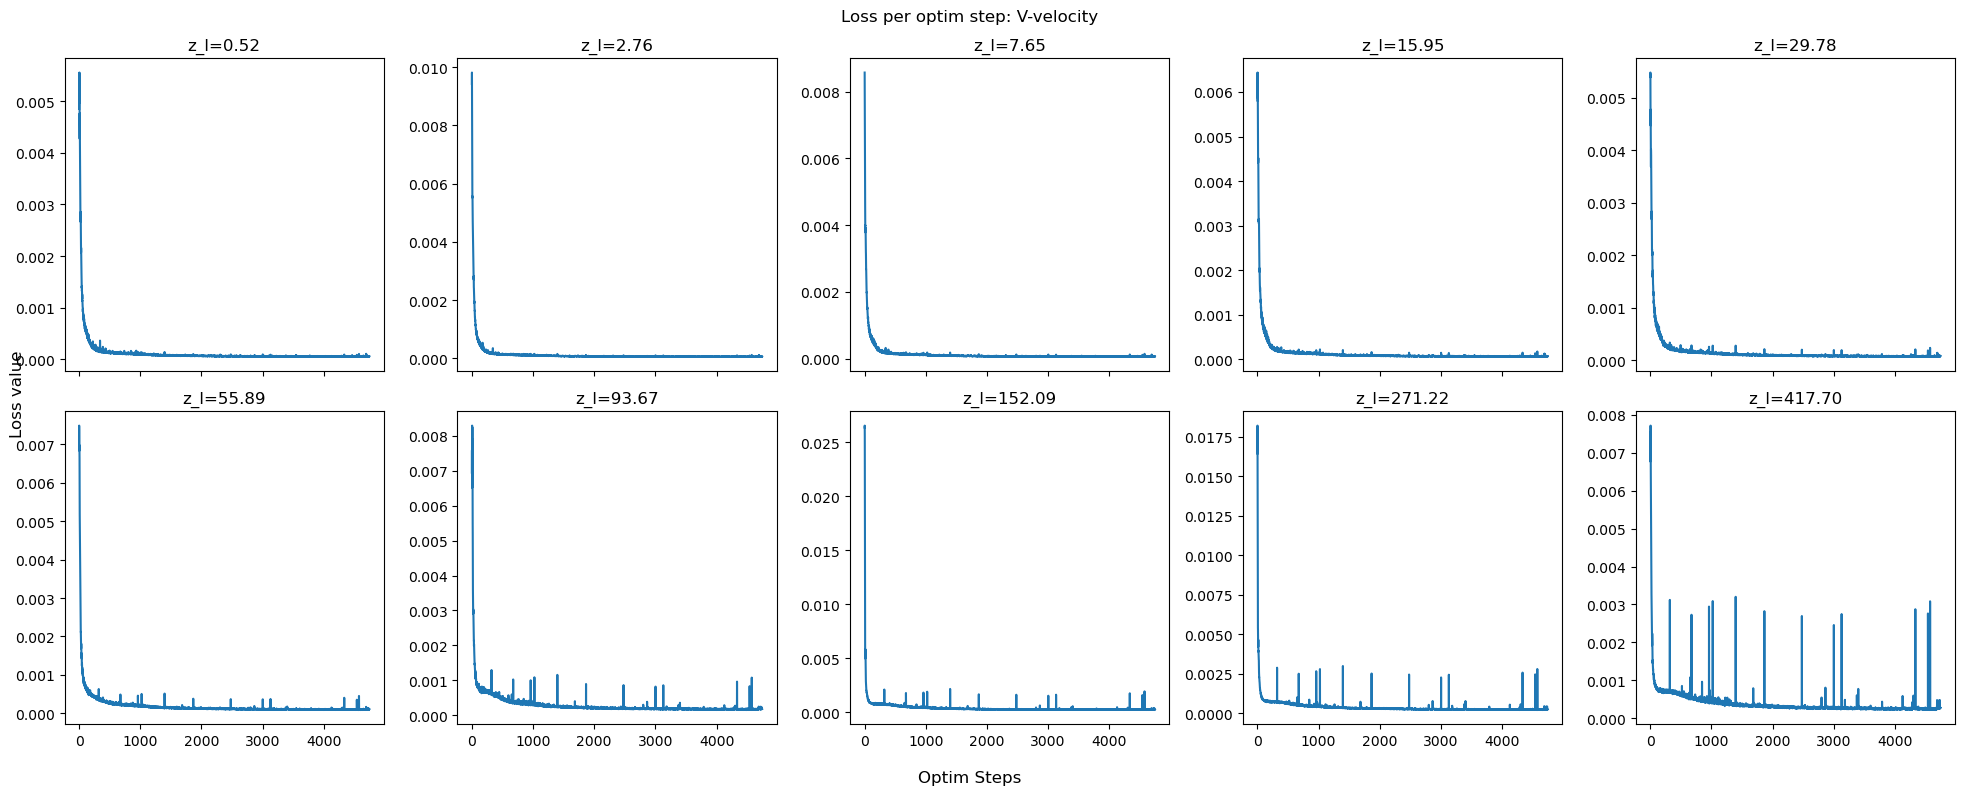

In [30]:
# plot
var = "vo"
extended_var = "v-velocity"
fig, ax = plot_loss_3d(var, extended_var)

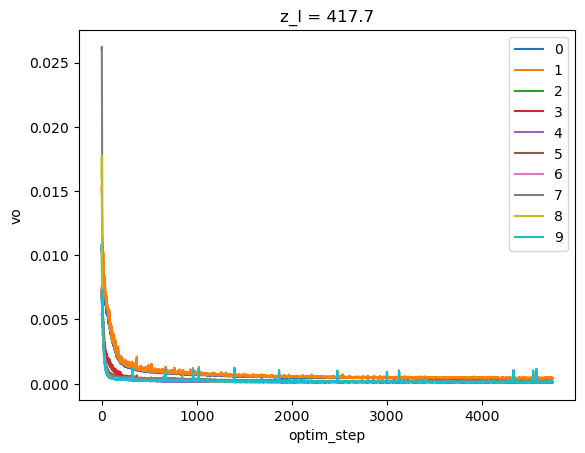

In [12]:
# plot all levels of a 3D variable together
varname = "vo"
vert_dim = "z_l"
for i in range(var_loss.sizes[vert_dim]):
    var_loss[varname].isel(z_l=i).plot(label=i)
plt.legend()
plt.show()

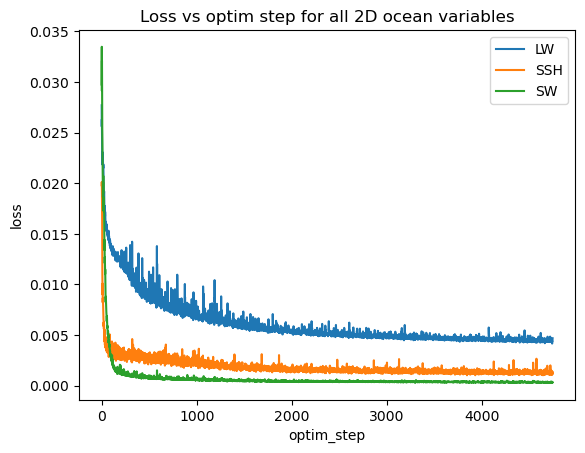

In [13]:
# all 2D variables
vars_2d = [var_name for var_name in var_loss.data_vars if "z_l" not in var_loss[var_name].dims]
for i in range(len(vars_2d)):
    var_loss[vars_2d[i]].plot(label=vars_2d[i])
plt.legend()
plt.ylabel("loss")
plt.xlabel("optim_step")
plt.title("Loss vs optim step for all 2D ocean variables")
figname = f"train_loss_nepochs-{ds.sizes['epoch']}_2Dvariables_{_prototype}.png"
figloc = os.path.join(_prototypes, _prototype.replace('-','_'), _expt, "figures", figname)
#plt.savefig(figloc, dpi=300)
plt.show()

In [16]:
# ocean level weights based on the harmonic mean
z_l_rec = 1./var_loss.coords["z_l"].values
harmean = 1./z_l_rec.mean()
weights = z_l_rec/harmean
weights

array([0.49868003, 0.09297002, 0.0336052 , 0.01611828, 0.00863157,
       0.00459885, 0.00274403, 0.0016899 , 0.00094764, 0.00061532])